In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


%matplotlib inline

In [46]:
df = pd.read_csv('admission_predict.csv')
df_train = df.iloc[:300,:] # 1st 300 records for training
df_test = df.iloc[300:,:] # last 100 records for testing


In [47]:
# linear regression model for “GRE score” and “chance of admit” from training data
X_train = np.c_[df_train['GRE Score'].values]
y_train = df_train['Chance of Admit'].tolist()
model_gre = LinearRegression()

# print(np.corrcoef(X_train,y_train))

model_gre.fit(X_train,y_train)

LinearRegression()

In [48]:
# linear regression model for “CGPA score” and “chance of admit” from training data
x2_train = np.c_[df_train['CGPA'].values]

model_cgpa = LinearRegression()
model_cgpa.fit(x2_train,y_train)


LinearRegression()

In [52]:
X_test = np.c_[df_test['GRE Score'].values]
y_test = df_test['Chance of Admit'].tolist()
x2_test = np.c_[df_test['CGPA'].values]
test_yhat = model_gre.predict(X_test)
test_yhat2 = model_cgpa.predict(x2_test)

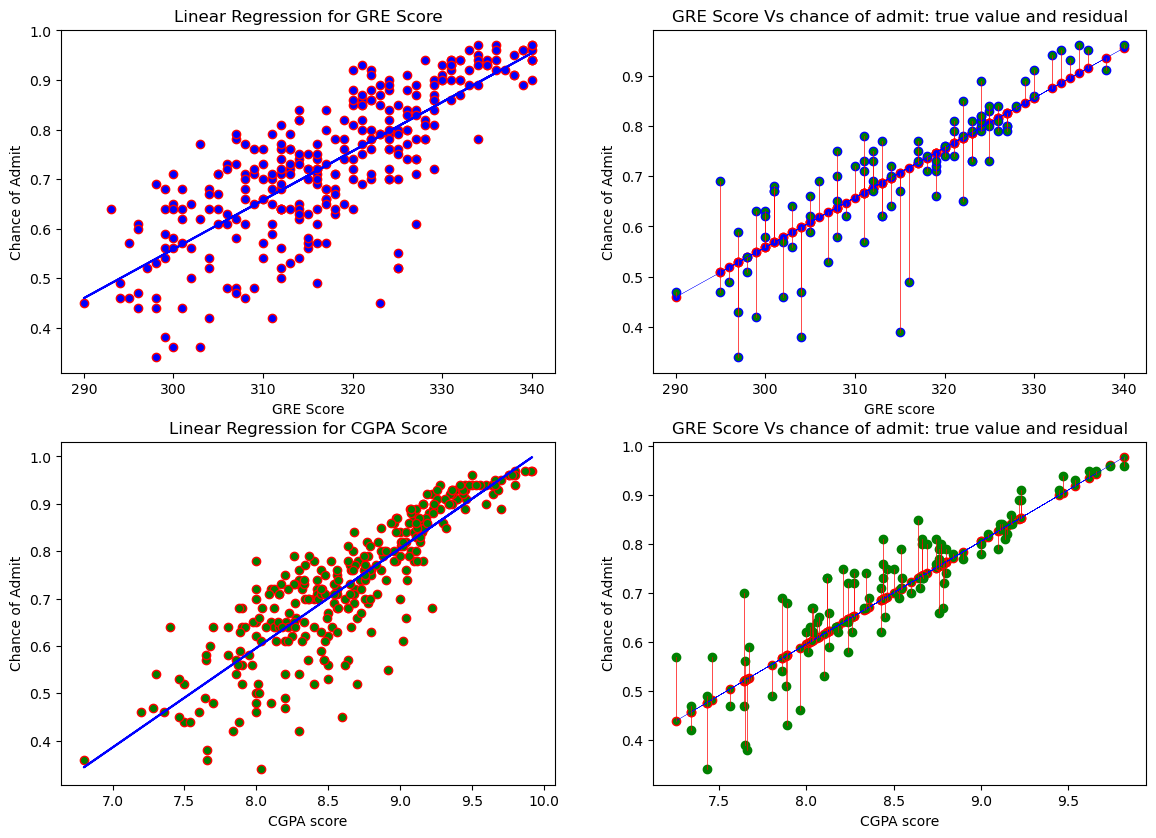

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), dpi=100)

# plot for GRE score(training)
ax[0,0].scatter(X_train, y_train, color='blue',edgecolor='r')
ax[0,0].plot(X_train, train_yhat, color='blue')
ax[0,0].set_xlabel("GRE Score")
ax[0,0].set_ylabel("Chance of Admit")
ax[0,0].set_title("Linear Regression for GRE Score")


# plot for CGPA score(training)
ax[1,0].scatter(x2_train, y_train, color='green',edgecolor='r')
ax[1,0].plot(x2_train, train_yhat2, color='blue')
ax[1,0].set_xlabel("CGPA score")
ax[1,0].set_ylabel("Chance of Admit")
ax[1,0].set_title("Linear Regression for CGPA Score")

# the true values from testing set and the residual line for GRE score
# plot the predicted points along the prediction line

ax[0,1].scatter(X_test,test_yhat,color='b',edgecolor='r') #predicted points
ax[0,1].plot(X_test,test_yhat,color='b',linewidth=.2) #prediction line
ax[0,1].set_xlabel("GRE score")
ax[0,1].set_ylabel("Chance of Admit")
ax[0,1].set_title("GRE Score Vs chance of admit: true value and residual")
# plot the true values
ax[0,1].scatter(X_test,y_test,color='g',edgecolor='b') #test y: true value

# plot the residual line
# get all the x coordinate (X_test) from the test dataset
tmp = np.reshape(X_test,[1,len(X_test)])[0]

#the following print statements are for better understanding
#print("X_test", X_test)
#print("np.reshape(X_test,[1,len(X_test)])", np.reshape(X_test,[1,len(X_test)]))
#print("tmp:",tmp)

tmp_x = []
tmp_y = []
for i in range(len(X_test)): #for each x in test set
    tmp_x = np.append(tmp_x,tmp[i]) #get x coordinate
    tmp_y = np.append(tmp_y,test_yhat[i]) #get predicted y coordinate
    tmp_x = np.append(tmp_x,tmp[i]) #get x coordinate again
    tmp_y = np.append(tmp_y,y_test[i]) #get test y coordinate
    ax[0,1].plot(tmp_x,tmp_y,color='red',linewidth=0.5) #draw the vertical residual line 
    tmp_x = []
    tmp_y = []

############################################################
# the true values from testing set and the residual line for GRE score
# plot the predicted points along the prediction line

ax[1,1].scatter(x2_test,test_yhat2,color='green',edgecolor='r') #predicted points
ax[1,1].plot(x2_test,test_yhat2,color='b',linewidth=.2) #prediction line
ax[1,1].set_xlabel("CGPA score")
ax[1,1].set_ylabel("Chance of Admit")
ax[1,1].set_title("GRE Score Vs chance of admit: true value and residual")
# plot the true values
ax[1,1].scatter(x2_test,y_test,color='g',) #test y: true value

# plot the residual line
# get all the x coordinate (X_test) from the test dataset
tmp = np.reshape(x2_test,[1,len(x2_test)])[0]

#the following print statements are for better understanding
#print("X_test", X_test)
#print("np.reshape(X_test,[1,len(X_test)])", np.reshape(X_test,[1,len(X_test)]))
#print("tmp:",tmp)

tmp_x = []
tmp_y = []
for i in range(len(x2_test)): #for each x in test set
    tmp_x = np.append(tmp_x,tmp[i]) #get x coordinate
    tmp_y = np.append(tmp_y,test_yhat2[i]) #get predicted y coordinate
    tmp_x = np.append(tmp_x,tmp[i]) #get x coordinate again
    tmp_y = np.append(tmp_y,y_test[i]) #get test y coordinate
    ax[1,1].plot(tmp_x,tmp_y,color='r',linewidth=0.5) #draw the vertical residual line (
    tmp_x = []
    tmp_y = []


plt.show()